# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data?resource=download . Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [256]:
# Your code here
import pandas as pd
fraud = pd.read_csv("Fraud.csv")
fraud =fraud.sample(100000)
fraud.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3342574,253,PAYMENT,2319.61,C639152325,4350.86,2031.25,M171689188,0.0,0.0,0,0
5465562,379,PAYMENT,13312.22,C1455211821,20121.00,6808.78,M1234400945,0.0,0.0,0,0
1783359,162,PAYMENT,17693.10,C509207956,30216.00,12522.90,M642137224,0.0,0.0,0,0


### What is the distribution of the outcome? 

In [352]:
# Your response here
fraud['isFraud'].value_counts()

0    99878
1      122
Name: isFraud, dtype: int64

### Clean the dataset. Pre-process it to make it suitable for ML training. Feel free to explore, drop, encode, transform, etc. Whatever you feel will improve the model score.

In [353]:
# Your code here
fraud.reset_index(drop=True, inplace=True)
print(fraud.dtypes)
print(fraud.isnull().sum())
print(fraud.describe())
print(fraud['isFraud'].value_counts())



step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
type_mapped         int64
Fraud_Dest          int64
Fraud_Orig        float64
dtype: object
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
type_mapped       0
Fraud_Dest        0
Fraud_Orig        0
dtype: int64
                step        amount  oldbalanceOrg  newbalanceOrig  \
count  100000.000000  1.000000e+05   1.000000e+05    1.000000e+05   
mean      243.557880  1.776355e+05   8.253052e+05    8.466700e+05   
std       142.073478  6.038890e+05   2.865992e+06    2.901656e+06   
min         1.000000  7.300000e-01   0.000000e+00    

In [354]:
mismos_valores = fraud['isFraud'].equals(fraud['isFlaggedFraud'])

# Imprimir el resultado
if mismos_valores:
    print("'isFraud' and 'isFlaggedFraud' are not different.")
else:
    print("'isFraud' and 'isFlaggedFraud' are different.")

'isFraud' and 'isFlaggedFraud' are different.


Description of variables:

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction."

)

In [355]:
fraud_fraud = fraud[fraud['isFraud']==1]
fraud_fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_mapped,Fraud_Dest,Fraud_Orig
count,122.000000,1.220000e+02,1.220000e+02,1.220000e+02,1.220000e+02,1.220000e+02,122.0,122.0,122.0,122.0,122.0
mean,325.844262,1.301673e+06,1.424951e+06,1.266882e+05,6.650481e+05,1.319728e+06,1.0,0.0,1.0,1.0,0.0
std,224.137908,2.221270e+06,3.020377e+06,1.399317e+06,2.695893e+06,3.695891e+06,0.0,0.0,0.0,0.0,0.0
min,1.000000,4.530710e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,1.0,1.0,0.0
25%,127.500000,1.150278e+05,9.849830e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,1.0,1.0,0.0
50%,300.500000,3.636710e+05,3.543131e+05,0.000000e+00,0.000000e+00,2.933056e+04,1.0,0.0,1.0,1.0,0.0
75%,534.000000,1.138580e+06,1.138580e+06,0.000000e+00,1.663021e+05,1.054479e+06,1.0,0.0,1.0,1.0,0.0
max,730.000000,1.000000e+07,2.545597e+07,1.545597e+07,2.682958e+07,3.461831e+07,1.0,0.0,1.0,1.0,0.0


In [356]:
fraud_no_fraud = fraud[fraud['isFraud']==0]
fraud_no_fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_mapped,Fraud_Dest,Fraud_Orig
count,99878.000000,9.987800e+04,9.987800e+04,9.987800e+04,9.987800e+04,9.987800e+04,99878.0,99878.0,99878.000000,99878.000000,99878.0
mean,243.457368,1.762625e+05,8.245728e+05,8.475495e+05,1.087309e+06,1.209828e+06,0.0,0.0,0.432788,0.000140,0.0
std,141.916826,5.980005e+05,2.865738e+06,2.902910e+06,3.528633e+06,3.837907e+06,0.0,0.0,0.495464,0.011839,0.0
min,1.000000,7.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.000000,0.0
25%,156.000000,1.333737e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.000000,0.0
50%,240.000000,7.410962e+04,1.415650e+04,0.000000e+00,1.312666e+05,2.115385e+05,0.0,0.0,0.000000,0.000000,0.0
75%,335.000000,2.079304e+05,1.064195e+05,1.444596e+05,9.284076e+05,1.097803e+06,0.0,0.0,1.000000,0.000000,0.0
max,718.000000,6.423445e+07,4.169914e+07,4.169084e+07,2.916677e+08,3.215898e+08,0.0,0.0,1.000000,1.000000,0.0


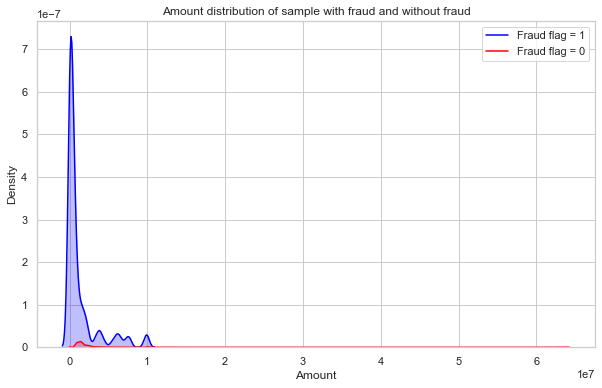

Fraud transaction are normally with less amount, more homogenious. Normal transaction is not so homogenious.
mean of the amount of fraud transactions: 1301672.511885246
mean of the amount of fraud transactions: 1301672.511885246 Percentile 80: 1628026.8120000013
mean of the amount of no fraud transactions: 176262.46380654266 Percentile 80: 244821.64800000004


In [357]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))

sns.kdeplot(fraud_fraud['amount'], shade=True, label='Fraud flag = 1', color='blue')
sns.kdeplot(fraud_no_fraud['amount'], shade=True, label='Fraud flag = 0', color='red')

# Añadir título y etiquetas de los ejes
plt.title('Amount distribution of sample with fraud and without fraud')
plt.xlabel('Amount')
plt.ylabel('Density')

# Añadir una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
percentile_80 = np.percentile(fraud_fraud['amount'], 80)
print('Fraud transaction are normally with less amount, more homogenious. Normal transaction is not so homogenious.')
print('mean of the amount of fraud transactions:',fraud_fraud['amount'].mean())


# Imprimir el percentil 80%
print('mean of the amount of fraud transactions:',fraud_fraud['amount'].mean(),'Percentile 80:',np.percentile(fraud_fraud['amount'], 80))
print('mean of the amount of no fraud transactions:',fraud_no_fraud['amount'].mean(),'Percentile 80:',np.percentile(fraud_no_fraud['amount'], 80))

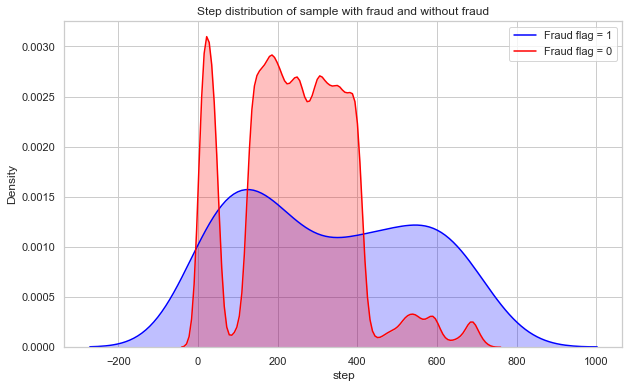

not so intuitive


In [358]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))

sns.kdeplot(fraud_fraud['step'], shade=True, label='Fraud flag = 1', color='blue')
sns.kdeplot(fraud_no_fraud['step'], shade=True, label='Fraud flag = 0', color='red')

# Añadir título y etiquetas de los ejes
plt.title('Step distribution of sample with fraud and without fraud')
plt.xlabel('step')
plt.ylabel('Density')

# Añadir una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
print('not so intuitive')

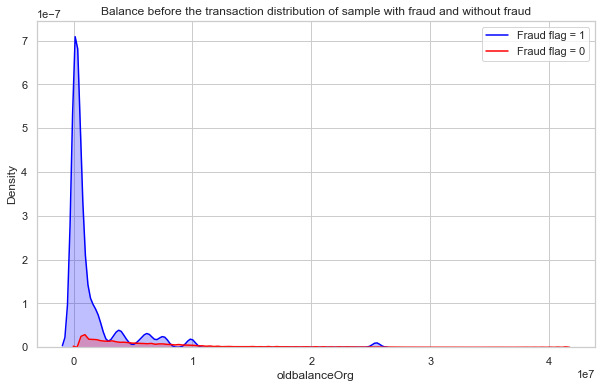

mean of the balance before transactions  of fraud transactions: 1424950.9096721315 Percentile 90: 4009383.514000001
mean of the balance before transactions  of no fraud transactions: 824572.7598160786 Percentile 90: 1760298.5470000028
Very intuitive, less balance in the origin account before fraud


In [359]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))

sns.kdeplot(fraud_fraud['oldbalanceOrg'], shade=True, label='Fraud flag = 1', color='blue')
sns.kdeplot(fraud_no_fraud['oldbalanceOrg'], shade=True, label='Fraud flag = 0', color='red')

# Añadir título y etiquetas de los ejes
plt.title('Balance before the transaction distribution of sample with fraud and without fraud')
plt.xlabel('oldbalanceOrg')
plt.ylabel('Density')

# Añadir una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
print('mean of the balance before transactions  of fraud transactions:',fraud_fraud['oldbalanceOrg'].mean(),'Percentile 90:',np.percentile(fraud_fraud['oldbalanceOrg'], 90))
print('mean of the balance before transactions  of no fraud transactions:',fraud_no_fraud['oldbalanceOrg'].mean(),'Percentile 90:',np.percentile(fraud_no_fraud['oldbalanceOrg'], 90)
     )
print('Very intuitive, less balance in the origin account before fraud')

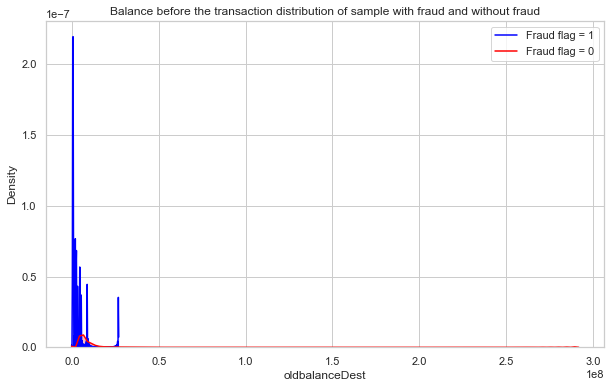

mean of the balance in dest. before transactions  of fraud transactions: 665048.0500819669 Percentile 90: 974844.1130000005
mean of the balance before transactions in dest.  of no fraud transactions: 1087308.8707221742 Percentile 90: 2877470.631000001
Very intuitive, less balance in dest. for fraud transactions


In [360]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))

sns.kdeplot(fraud_fraud['oldbalanceDest'], shade=True, label='Fraud flag = 1', color='blue')
sns.kdeplot(fraud_no_fraud['oldbalanceDest'], shade=True, label='Fraud flag = 0', color='red')

# Añadir título y etiquetas de los ejes
plt.title('Balance before the transaction distribution of sample with fraud and without fraud')
plt.xlabel('oldbalanceDest')
plt.ylabel('Density')

# Añadir una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
print('mean of the balance in dest. before transactions  of fraud transactions:',fraud_fraud['oldbalanceDest'].mean(),'Percentile 90:',np.percentile(fraud_fraud['oldbalanceDest'], 90))
print('mean of the balance before transactions in dest.  of no fraud transactions:',fraud_no_fraud['oldbalanceDest'].mean(),'Percentile 90:',np.percentile(fraud_no_fraud['oldbalanceDest'], 90)
     )
print('Very intuitive, less balance in dest. for fraud transactions')

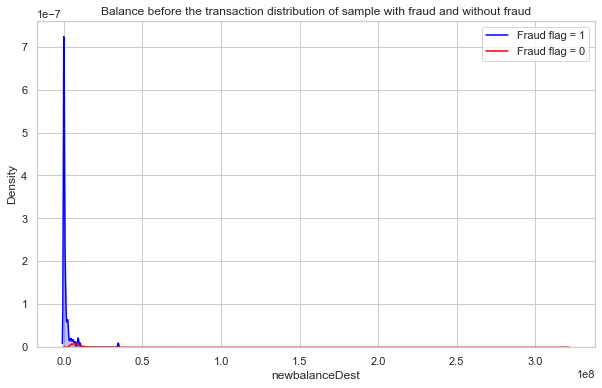

mean of the balance in dest. after transactions  of fraud transactions: 1319728.4615573774 Percentile 90: 3551261.598000004
mean of the balance after transactions in dest.  of no fraud transactions: 1209828.1800797079 Percentile 90: 3150868.279
Very intuitive, less balance in dest. for fraud transactions


In [361]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))

sns.kdeplot(fraud_fraud['newbalanceDest'], shade=True, label='Fraud flag = 1', color='blue')
sns.kdeplot(fraud_no_fraud['newbalanceDest'], shade=True, label='Fraud flag = 0', color='red')

# Añadir título y etiquetas de los ejes
plt.title('Balance before the transaction distribution of sample with fraud and without fraud')
plt.xlabel('newbalanceDest')
plt.ylabel('Density')

# Añadir una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
print('mean of the balance in dest. after transactions  of fraud transactions:',fraud_fraud['newbalanceDest'].mean(),'Percentile 90:',np.percentile(fraud_fraud['newbalanceDest'], 90))
print('mean of the balance after transactions in dest.  of no fraud transactions:',fraud_no_fraud['newbalanceDest'].mean(),'Percentile 90:',np.percentile(fraud_no_fraud['newbalanceDest'], 90)
     )
print('Very intuitive, less balance in dest. for fraud transactions')

In [362]:
print(fraud_fraud['type'].unique())
print(fraud_no_fraud['type'].unique())

['TRANSFER' 'CASH_OUT']
['PAYMENT' 'CASH_OUT' 'CASH_IN' 'TRANSFER' 'DEBIT']


In [363]:
label_mapping = {'PAYMENT': 0, 'CASH_IN': 0, 'CASH_OUT': 1, 'TRANSFER': 1, 'DEBIT': 0}

# Aplicar el mapeo al DataFrame
fraud['type_mapped'] = fraud['type'].map(label_mapping)

# Ahora puedes binarizar la columna type_mapped
# Define los límites de los bins
bins = [0, 1]  # Los límites de los bins deben incluir todos los valores posibles, más un límite adicional para el final

# Etiquetas para los bins
bin_labels = ['Bin1', 'Bin2', 'Bin3', 'Bin4', 'Bin5']

In [364]:
print(fraud_fraud['nameDest'].nunique())
print(fraud_no_fraud['nameDest'].nunique())

fraud_destinations = fraud.groupby('nameDest')['isFraud'].max()

# Luego, crea una nueva columna 'Fraud_Dest' que sea 1 si el indicador de fraude es 1 para algún registro en el grupo, 0 en caso contrario
fraud['Fraud_Dest'] = fraud['nameDest'].map(fraud_destinations)

# Si algún registro en 'isFraud' es 1 para un 'nameDest', 'Fraud_Dest' será 1 para todos los registros con ese 'nameDest'

# Rellena los NaN con 0 en caso de que no haya habido ningún fraude en ese 'nameDest'
fraud['Fraud_Dest'].fillna(0, inplace=True)


122
92924


In [403]:
print(fraud_fraud['nameOrig'].nunique())
print(fraud_no_fraud['nameOrig'].nunique())

fraud_orig = fraud.groupby('nameOrig')['isFraud'].max()

# Luego, crea una nueva columna 'Fraud_Dest' que sea 1 si el indicador de fraude es 1 para algún registro en el grupo, 0 en caso contrario
fraud['Fraud_Orig'] = fraud['nameOrig'].map(fraud_destinations)

# Si algún registro en 'isFraud' es 1 para un 'nameDest', 'Fraud_Dest' será 1 para todos los registros con ese 'nameDest'

# Rellena los NaN con 0 en caso de que no haya habido ningún fraude en ese 'nameDest'
fraud['Fraud_Orig'].fillna(0, inplace=True)
fraud['Fraud_Relation']=fraud['Fraud_Dest']+fraud['Fraud_Orig']

fraud['Fraud_Relation_Name']=fraud['nameDest']+fraud['nameOrig']
fraud_rel = fraud.groupby('Fraud_Relation_Name')['isFraud'].max()

fraud['Fraud_rel'] = fraud['Fraud_Relation_Name'].map(fraud_rel)

# Luego, crea una nueva columna 'Fraud_Dest' que sea 1 si el indicador de fraude es 1 para algún registro en el grupo, 0 en caso contrario
fraud['Fraud_Orig'] = fraud['nameOrig'].map(fraud_destinations)
fraud[fraud['isFraud']==1][['Fraud_Relation_Name']]
fraud_rel

122
99877


Fraud_Relation_Name
C1000057469C1362759065    0
C1000057469C728959852     0
C1000079902C1754022041    0
C1000124976C1226571881    0
C1000156006C414938147     0
                         ..
M999638185C1871777216     0
M999832957C632738020      0
M99985492C784440195       0
M999863673C1009530817     0
M999955508C446239183      0
Name: isFraud, Length: 100000, dtype: int64

In [404]:
fraud_fraud = fraud[fraud['isFraud']==1]
fraud_no_fraud = fraud[fraud['isFraud']==0]


### Run a logisitc regression classifier and evaluate its accuracy.

In [407]:
print('Candidate variables: step, amount and choosing one of these, as there are correlated:newbalanceDest,oldbalanceDest')
print(fraud.columns)  # Imprimir los nombres de las columnas
X_A = fraud[['type_mapped','isFlaggedFraud','Fraud_rel']]
#'amount', 'oldbalanceOrg', 'oldbalanceDest'
y_A = fraud['isFraud']
from sklearn.model_selection import train_test_split
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, y_A)

X_B = fraud[['amount', 'newbalanceOrig', 'newbalanceDest','type_mapped','isFlaggedFraud','Fraud_rel']]
y_B = fraud['isFraud']

X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B)
from sklearn.linear_model import LogisticRegression

Regression_Model_A = LogisticRegression(max_iter=1000)
Regression_Model_A.fit(X_train_A, y_train_A)
print('Model A SCORE:', Regression_Model_A.score(X_test_A, y_test_A))

Regression_Model_B = LogisticRegression(max_iter=1000)
Regression_Model_B.fit(X_train_B, y_train_B)
print('Model B SCORE:', Regression_Model_B.score(X_test_B, y_test_B))

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Calcular precisión, recall y F1-score para el modelo A
y_pred_A = Regression_Model_A.predict(X_test_A)
print("Precision Model A:", precision_score(y_test_A, y_pred_A))
print("Recall Model A:", recall_score(y_test_A, y_pred_A))
print("F1-score Model A:", f1_score(y_test_A, y_pred_A))

# Calcular precisión, recall y F1-score para el modelo B
y_pred_B = Regression_Model_B.predict(X_test_B)
print("Precision Model B:", precision_score(y_test_B, y_pred_B))
print("Recall Model B:", recall_score(y_test_B, y_pred_B))
print("F1-score Model B:", f1_score(y_test_B, y_pred_B))

Candidate variables: step, amount and choosing one of these, as there are correlated:newbalanceDest,oldbalanceDest
Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_mapped', 'Fraud_Dest', 'Fraud_Orig',
       'Fraud_Relation', 'Fraud_Relation_Name', 'Fraud_rel'],
      dtype='object')
Model A SCORE: 1.0
Model B SCORE: 0.99844
Precision Model A: 1.0
Recall Model A: 1.0
F1-score Model A: 1.0
Precision Model B: 0.3333333333333333
Recall Model B: 0.02631578947368421
F1-score Model B: 0.048780487804878044


In [427]:
print('Candidate variables: step, amount and choosing one of these, as there are correlated:newbalanceDest,oldbalanceDest')
print(fraud.columns)  # Imprimir los nombres de las columnas
X_C= fraud[['type_mapped','Fraud_rel']]
#'amount', 'oldbalanceOrg', 'oldbalanceDest','isFlaggedFraud',
y_C = fraud['isFraud']
from sklearn.model_selection import train_test_split
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X_C, y_C)


Regression_Model_C = LogisticRegression(max_iter=1000)
Regression_Model_C.fit(X_train_C, y_train_C)
print('Model C SCORE:', Regression_Model_C.score(X_test_C, y_test_C))

# Calcular precisión, recall y F1-score para el modelo A
y_pred_C = Regression_Model_A.predict(X_test_C)
print("Precision Model C:", precision_score(y_test_C, y_pred_C))
print("Recall Model C:", recall_score(y_test_C, y_pred_C))
print("F1-score Model C:", f1_score(y_test_C, y_pred_C))
confusion_matrix(y_test_C,y_pred_C)


Candidate variables: step, amount and choosing one of these, as there are correlated:newbalanceDest,oldbalanceDest
Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_mapped', 'Fraud_Dest', 'Fraud_Orig',
       'Fraud_Relation', 'Fraud_Relation_Name', 'Fraud_rel'],
      dtype='object')
Model C SCORE: 1.0
Precision Model C: 1.0
Recall Model C: 1.0
F1-score Model C: 1.0


array([[24964,     0],
       [    0,    36]], dtype=int64)

In [408]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_B,y_pred_B)

array([[24960,     2],
       [   37,     1]], dtype=int64)

In [409]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_A,y_pred_A)

array([[24967,     0],
       [    0,    33]], dtype=int64)

# Oversamping over "A" approach :

In [410]:
from sklearn.utils import resample
train = pd.concat([X_train_A, y_train_A],axis=1)
display(train.shape)
train.head()


(75000, 4)

,type_mapped,isFlaggedFraud,Fraud_rel,isFraud
19431,0,0,0,0
33278,0,0,0,0
44286,1,0,0,0
64594,0,0,0,0
8775,1,0,0,0


In [411]:
yes_fraud = train[train['isFraud']==1]
no_fraud = train[train['isFraud']==0]
display(yes_fraud.shape)
display(no_fraud.shape)

(89, 4)

(74911, 4)

In [412]:
yes_fraud_oversampled = resample(yes_fraud, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(no_fraud),#<- make both sets the same size
                                    random_state=0)
display(yes_fraud_oversampled.shape)

(74911, 4)

In [413]:
train_oversampled = pd.concat([no_fraud,yes_fraud_oversampled])
train_oversampled.head()

,type_mapped,isFlaggedFraud,Fraud_rel,isFraud
19431,0,0,0,0
33278,0,0,0,0
44286,1,0,0,0
64594,0,0,0,0
8775,1,0,0,0


In [421]:
y_train_over = train_oversampled['isFraud'].copy()
X_train_over = train_oversampled.drop('isFraud',axis = 1).copy()
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test_A)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("precision: ",precision_score(y_test_A,pred))
print("recall: ",recall_score(y_test_A,pred))
print("f1: ",f1_score(y_test_A,pred))
print('Model B OVERSAMPLED SCORE:',LR.score(X_test_A, y_test_A))
from sklearn.metrics import confusion_matrix


confusion_matrix(y_test_A,pred)

precision:  1.0
recall:  1.0
f1:  1.0
Model B OVERSAMPLED SCORE: 1.0


array([[24967,     0],
       [    0,    33]], dtype=int64)

# Undersampling over "A" approach:

In [417]:
no_fraud_undersampled = resample(no_fraud, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(yes_fraud),#<- make both sets the same size
                                    random_state=0)
display(no_fraud_undersampled.shape)

(89, 4)

In [418]:
train_undersampled = pd.concat([yes_fraud,no_fraud_undersampled])
train_undersampled.head()

,type_mapped,isFlaggedFraud,Fraud_rel,isFraud
26598,1,0,1,1
83479,1,0,1,1
51432,1,0,1,1
48899,1,0,1,1
48742,1,0,1,1


In [420]:
y_train_under = train_undersampled['isFraud'].copy()
X_train_under = train_undersampled.drop('isFraud',axis = 1).copy()
LR_under = LogisticRegression(max_iter=1000)
LR_under.fit(X_train_under, y_train_under)
pred_under = LR_under.predict(X_test_A)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("precision: ",precision_score(y_test_A,pred_under))
print("recall: ",recall_score(y_test_A,pred_under))
print("f1: ",f1_score(y_test_A,pred_under))
print('Model B UNDERSAMPLED SCORE:',LR_under.score(X_test_A, y_test_A))
from sklearn.metrics import confusion_matrix


confusion_matrix(y_test_A,pred_under)

precision:  1.0
recall:  1.0
f1:  1.0
Model B UNDERSAMPLED SCORE: 1.0


array([[24967,     0],
       [    0,    33]], dtype=int64)

### Now pick a model of your choice and evaluate its accuracy.

In [430]:
# Your code here

print('Model C SCORE:', Regression_Model_C.score(X_test_C, y_test_C))
print("Precision Model C:", precision_score(y_test_C, y_pred_C))
print("Recall Model C:", recall_score(y_test_C, y_pred_C))
print("F1-score Model C:", f1_score(y_test_C, y_pred_C))
print('Model C, that only considers the type of the transaction and the created variable that aggregates the IDs of origin and destine is robust because has no errors, good precision withou false positives and good recall without false negatives')
confusion_matrix(y_test_C,y_pred_C)

Model C SCORE: 1.0
Precision Model C: 1.0
Recall Model C: 1.0
F1-score Model C: 1.0
Model C, that only considers the type of the transaction and the created variable that aggregates the IDs of origin and destine is robust because has no errors, good precision withou false positives and good recall without false negatives


array([[24964,     0],
       [    0,    36]], dtype=int64)

### Which model worked better and how do you know?

In [431]:
# Your response here
print('Model C, that only considers the type of the transaction and the created variable that aggregates the IDs of origin and destine is robust because has no errors, good precision withou false positives and good recall without false negatives')
confusion_matrix(y_test_C,y_pred_C)

fraud.to_csv('fraud_reduced_sample.csv')

Model C, that only considers the type of the transaction and the created variable that aggregates the IDs of origin and destine is robust because has no errors, good precision withou false positives and good recall without false negatives


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.